In [3]:
import numpy as np
from qutip import (about, basis, fmmesolve, fsesolve,
                   plot_expectation_values, sigmax, sigmaz)

In [4]:
# define constants
delta = 0.2 * 2 * np.pi
eps0 = 2 * np.pi
A = 2.5 * 2 * np.pi
omega = 2 * np.pi

# Non driving hamiltoninan
H0 = -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz()

# Driving Hamiltonian
H1 = [A / 2.0 * sigmaz(), "sin(w*t)"]
args = {"w": omega}

# combined hamiltonian
H = [H0, H1]

# initial state
psi0 = basis(2, 0)

`qutip.fsesolve` with additional parameter `T` defining period of time dependence

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\core\coefficient.py:423: UserWarning: `cython`, `setuptools` and `filelock` are required for compilation of string coefficents. Falling back on `eval`.
  warnings.warn(


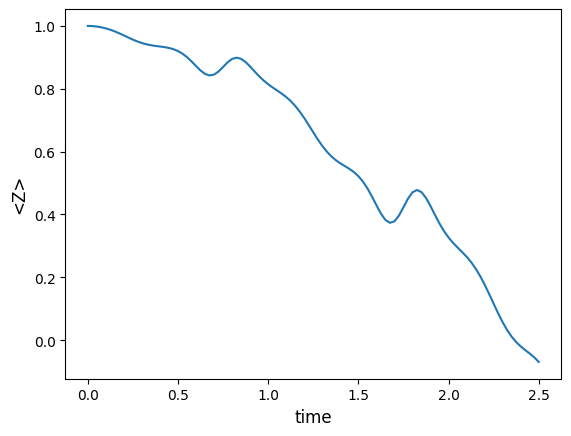

In [5]:
# period time
T = 2 * np.pi / omega
# simulation time
tlist = np.linspace(0, 2.5 * T, 101)
# simulation
result = fsesolve(H, psi0, tlist, T=T, e_ops=[sigmaz()], args=args)

plot_expectation_values([result], ylabels=["<Z>"]);

dissipative process using `fmmesolve()`

In [6]:
# Noise Spectral Density
gamma = 0.5


def noise_spectrum(omega):
    return (omega > 0) * gamma * omega / (4 * np.pi)


# Coupling operator and noise spectrum
c_ops = [sigmax()]
spectra_cb = [noise_spectrum]

# Solve using Fmmesolve
fme_result = fmmesolve(
    H,
    psi0,
    tlist,
    c_ops=c_ops,
    spectra_cb=spectra_cb,
    e_ops=[sigmaz()],
    T=T,
    args=args,
)

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.01s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.02s. Est. time left: 00:00:00:00
80.0%. Run time:   0.02s. Est. time left: 00:00:00:00
90.0%. Run time:   0.02s. Est. time left: 00:00:00:00
100.0%. Run time:   0.03s. Est. time left: 00:00:00:00
Total run time:   0.03s


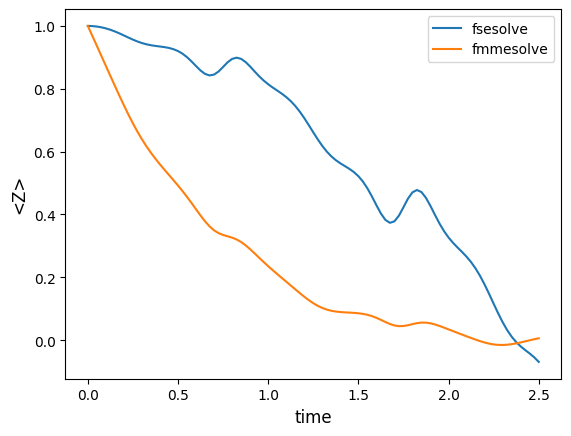

In [7]:
fig, axes = plot_expectation_values([result, fme_result], ylabels=["<Z>"])
axes[0].legend(['fsesolve', 'fmmesolve'], loc='upper right');